In [1]:
def make_reward_plot_multi(rewards_list, labels, window_size=10, save_path=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.ticker as ticker

    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': 10,
        'axes.labelsize': 10,
        'axes.titlesize': 11,
        'legend.fontsize': 9,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
    })

    def moving_average(values, window):
        values = np.array(values)
        valid = ~np.isnan(values)
        values = values[valid]
        return np.convolve(values, np.ones(window)/window, mode='valid')

    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

    fig, ax = plt.subplots(dpi=300, figsize=(6, 4))

    for idx, rewards in enumerate(rewards_list):
        rewards = np.array(rewards)
        valid = ~np.isnan(rewards)
        x = np.arange(len(rewards))[valid]
        y = rewards[valid]

        y_avg = moving_average(y, window=window_size)
        # *** THIS IS THE KEY FIX ***
        x_avg = x[window_size - 1:]

        color = colors[idx % len(colors)]

        # Raw line (faint)
        ax.plot(x, y, alpha=0.2, linewidth=1.2, color=color)

        # Moving average (strong line + label)
        ax.plot(x_avg, y_avg, label=labels[idx], linewidth=2.0, color=color)

    ax.set_xlabel("Training Step")
    ax.set_ylabel("Reward")
    ax.set_title("Reward Progression by Training Strategy")

    ax.grid(True, linestyle='--', alpha=0.3)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend(loc="upper left")
    fig.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', format='pdf')

    plt.show()


In [2]:
train_hint_rewards = [
0.581250011920929,
0.675000004470348,
0.600000008940697,
0.787500016391277,
0.509375013411045,
0.540625005960465,
0.456250004470348,
0.553124986588955,
0.284375004470348,
0.821875005960465,
0.681249983608723,
0.51249998062849,
0.709375023841858,
0.346875004470348,
0.484375007450581,
0.346875004470348,
0.518750004470348,
0.728124991059303,
0.506250001490116,
0.434374995529652,
0.431250020861626,
0.915625035762787,
0.540624998509884,
0.856250010430813,
0.518750004470348,
0.471874997019768,
0.568749994039536,
0.678125023841858,
0.528125010430813,
0.765625007450581,
0.968750029802322,
0.590625002980232,
0.878125041723251,
0.762500002980232,
0.759375005960465,
0.675000004470348,
0.640625007450581,
0.537499994039536,
0.721874989569187,
0.821875020861626,
0.984375029802322,
0.840625010430813,
0.528125017881393,
0.784375011920929,
0.893750011920929,
1.01562502980232,
0.759375005960465,
0.618750020861626,
0.67500002682209,
1.22812503576279,
0.537500023841858,
1.29687502980232,
0.756250023841858,
0.609375029802322,
0.621875032782555,
0.803124994039536,
0.771875008940697,
0.856250002980232,
0.725000023841858,
0.715625017881393,
0.725000008940697,
0.931250050663948,
0.634375035762787,
1.01562502980232,
0.681250005960465,
0.646875008940697,
0.793750017881393,
0.759375020861626,
0.581250041723251,
0.90937501937151,
1.02187505364418,
0.809375017881393,
0.603125020861626,
0.700000017881393,
0.781250007450581,
0.896875023841858,
0.740625023841858,
0.912500023841858,
0.900000020861626,
0.84687502682209,
0.809375032782555,
0.765625029802322,
0.725000038743019,
0.587500035762787,
0.540625013411045,
0.778125010430813,
0.821875013411045,
1.01875001192093,
0.865625038743019,
0.584375023841858,
0.621875032782555,
0.959375023841858,
0.878125041723251,
0.937500059604645,
0.83125002682209,
0.737500041723251,
0.559375010430813,
1.20625001192093,
0.812500044703484,
1.03437502682209,
0.856250002980232,
0.578125029802322,
1.00312502682209,
0.76875002682209,
0.915625020861626,
0.712500020861626,
0.83125002682209,
0.84687501937151,
0.75312502682209,
1.04687504470348,
0.796875014901161,
0.878125041723251,
0.509375020861626,
0.925000041723251,
0.809375047683716,
0.575000017881393,
0.937500022351742,
0.665625020861626,
0.990625023841858,
0.778125032782555,
1.05000004172325,
0.806250035762787,
0.853125020861626,
0.80000002682209,
0.787500023841858,
0.53437502682209,
0.756250038743019,
0.556250020861626,
0.903125017881393,
0.86250002682209,
1.30625000596046,
0.581250041723251,
0.903125032782555,
1.23125001788139,
0.759375050663948,
0.968750014901161,
0.740625038743019,
0.806250035762787,
0.703125014901161,
0.521875008940697,
0.793750032782555,
1.04375001788139,
1.10312502086163,
0.906250029802322,
0.812500014901161,
0.603125035762787,
0.69062502682209,
0.687500022351742,
0.853125005960465,
0.765625029802322,
1.08750002086163,
1.03437504172325,
0.865624994039536,
0.700000017881393,
0.787500038743019,
0.856250025331974,
0.515625007450581,
1.04062502086163,
0.731249995529652,
0.78437502682209,
0.750000014901161,
0.850000016391277,
1.06562502682209,
0.590625032782555,
0.950000017881393,
1.22812503576279,
0.871875002980232,
1.05625002086163,
0.978125020861626,
1.03437502682209,
0.684375017881393,
1.015625,
0.896875023841858,
0.546875029802322,
0.775000020861626,
0.812500014901161,
0.962500035762787,
0.8968750461936,
0.756249994039536,
0.562500007450581,
1.00000001490116,
0.878125011920929,
1.07812505960464,
0.575000010430813,
1.14687505364418,
0.771875023841858,
1.17187502980232,
1.22812499850988,
0.928125038743019,
1.04062503576279,
0.865625008940697,
0.837500020861626,
0.962500035762787,
0.540625013411045,
0.471875011920929,
1.43750005960464,
0.471875011920929,
0.787500031292439,
0.868750020861626,
0.575000002980232,
0.446875020861626,
0.484375014901161,
0.737500011920929,
0.831250011920929,
0.903125010430813,
0.684375002980232,
1.05625002086163,
1.30625000596046,
0.440625011920929,
0.990625023841858,
0.915625020861626,
0.94062502682209,
0.762500002980232,
0.831250011920929,
0.568750023841858,
0.975000023841858,
0.881250038743019,
0.965625017881393,
0.790625013411045,
0.734375014901161,
0.959375008940697,
0.825000017881393,
1.01562501490116,
1.19375003874302,
0.762500017881393,
1.13750001788139,
0.746875032782555,
0.959374994039536,
0.96875,
0.771875023841858,
0.790625035762787,
0.806250020861626,
0.825000032782555,
0.703125014901161,
0.528125017881393,
0.603125028312206,
1.00937502086163,
0.756250016391277,
0.856250017881393,
0.818750008940697,
0.937500059604645,
1.04375004768372,
0.484375022351742,
0.812500014901161,
1.20312504470348,
1.03125001490116,
0.72187502682209,
1.43437501788139,
0.940624982118607,
0.931250005960465,
0.693750031292439,

]

In [3]:
train_no_hint_rewards = [
0.531249988824129,
0.537499986588955,
0.615624997764826,
0.768749982118607,
0.540625013411045,
0.653125002980232,
0.474999994039536,
0.546875007450581,
0.303124994039536,
0.565624997019768,
0.543750006705523,
0.418750006705523,
0.840624988079071,
0.349999994039536,
0.540625020861626,
0.387500010430813,
0.465625002980232,
0.634375005960465,
0.478125013411045,
0.421874988824129,
0.321874998509884,
0.759375028312206,
0.378124997019768,
0.524999991059303,
0.475000023841858,
0.568750008940697,
0.493750005960465,
0.61250002682209,
0.575000032782555,
0.775000020861626,
1.25000001490116,
0.578125029802322,
0.712500035762787,
0.825000017881393,
0.81562502682209,
0.559375017881393,
0.693750023841858,
0.537500023841858,
0.521875016391277,
0.743750005960465,
0.984375044703484,
0.92500002682209,
0.521875023841858,
0.696875028312206,
1.16562503576279,
0.921875044703484,
0.812500014901161,
0.587500035762787,
0.684375010430813,
1.31562504172325,
0.484375014901161,
1.20625001192093,
0.771875031292439,
0.509375005960465,
0.765625014901161,
0.759375050663948,
0.625000014901161,
0.428124994039536,
0.58125002682209,
0.590625017881393,
0.443749986588955,
0.53125,
0.584375001490116,
0.743749991059303,
0.459375005215406,
0.528125017881393,
0.740625008940697,
0.637500032782555,
0.456250011920929,
0.803125023841858,
0.89375002682209,
0.762500002980232,
0.543750010430813,
0.512500025331974,
0.762500002980232,
0.450000002980232,
0.756250001490116,
0.793750047683716,
0.756250008940697,
0.796875014901161,
0.890625014901161,
0.571875020861626,
0.525000005960465,
0.450000010430813,
0.556250013411045,
0.765625,
0.731250032782555,
0.640625029802322,
0.525000013411045,
0.606250017881393,
0.546875014901161,
0.693750031292439,
1.04375003278255,
0.681250013411045,
0.943750038743019,
0.75625005364418,
0.537500008940697,
0.98750002682209,
0.743750020861626,
0.803125023841858,
0.821875020861626,
0.621875017881393,
0.912500023841858,
0.784375011920929,
0.575000017881393,
0.625000014901161,
0.918750032782555,
0.621875032782555,
0.734375007450581,
0.881250038743019,
0.603125020861626,
0.756250023841858,
0.543750017881393,
0.693750023841858,
0.681250050663948,
0.609375044703484,
0.859375029802322,
0.637500032782555,
0.92500002682209,
0.778125017881393,
1.02812501788139,
0.787500023841858,
0.7875000461936,
0.84687502682209,
0.806250035762787,
0.537500016391277,
0.640625029802322,
0.562500029802322,
0.615625008940697,
0.615625031292439,
1.15000002086163,
0.515625014901161,
0.728125035762787,
0.765625014901161,
0.765625014901161,
0.737500011920929,
0.640625044703484,
0.800000041723251,
0.543750032782555,
0.578125029802322,
0.590625017881393,
0.593750044703484,
0.996875047683716,
0.828125014901161,
0.559375032782555,
0.568750038743019,
0.525000035762787,
0.553124994039536,
0.821875035762787,
0.553125016391277,
1.00937503576279,
0.787500016391277,
0.837500050663948,
0.762500017881393,
0.812500029802322,
0.812500044703484,
0.562500029802322,
0.934375032782555,
0.571875020861626,
0.821875020861626,
0.815625011920929,
0.878124997019768,
0.868750035762787,
0.684375032782555,
0.800000041723251,
0.778125017881393,
0.743750020861626,
0.912500023841858,
0.837500020861626,
0.756250023841858,
0.55000002682209,
0.950000017881393,
0.75,
0.556250035762787,
0.775000020861626,
0.896875023841858,
0.74062505364418,
0.925000041723251,
0.606250017881393,
0.48750001937151,
0.971875011920929,
0.637500032782555,
0.856250017881393,
0.625000029802322,
0.90937502682209,
0.812500029802322,
1.07187502086163,
1.23750002682209,
1.00312501192093,
0.803125008940697,
0.696875020861626,
0.856250017881393,
1.01562502980232,
0.58125002682209,
0.550000011920929,
1.37500005960464,
0.571875035762787,
0.656250044703484,
0.83125002682209,
0.575000032782555,
0.575000017881393,
0.521875008940697,
0.600000008940697,
0.684375032782555,
0.95625002682209,
0.662500038743019,
1.15000005066395,
1.0687500089407,
0.531250014901161,
0.731250017881393,
0.981250017881393,
0.796875029802322,
0.675000041723251,
0.784375011920929,
0.584375038743019,
0.809374995529652,
0.743750035762787,
0.828125029802322,
0.665625020861626,
0.834375023841858,
0.775000020861626,
0.828125029802322,
0.868750035762787,
1.17500002682209,
0.759375013411045,
1.23437501490116,
0.687500029802322,
0.993750013411045,
1.04687502980232,
0.7250000461936,
0.734375044703484,
0.821875035762787,
0.809375032782555,
0.73750002682209,
0.578125014901161,
0.528125040233135,
0.818750008940697,
0.815625011920929,
0.681250005960465,
0.640625029802322,
0.784375041723251,
1.01250000298023,
0.506250023841858,
0.796875029802322,
0.768750041723251,
0.959375023841858,
0.571875020861626,
1.33437502384186,
1.00937502086163,
1.03437504172325,
0.537500023841858,

]

In [4]:
import numpy as np
train_curriculum = [np.nan for i in range(120)]
train_curriculum += [
0.518750011920929,
0.790625050663948,
0.575000011920929,
0.993750028312206,
0.94062502682209,
0.575000017881393,
0.537500023841858,
0.828125014901161,
0.996875047683716,
0.587500035762787,
0.559375032782555,
0.625,
1.22500002384186,
0.728125035762787,
0.612500011920929,
0.571875020861626,
0.524999976158142,
0.921875,
0.593750022351742,
0.787500023841858,
0.80000002682209,
0.587500035762787,
0.59687502682209,
1.04687504470348,
0.809375032782555,
0.762500017881393,
0.649999976158142,
1.25312502682209,
0.653125032782555,
0.58125002682209,
0.853125050663948,
0.587500035762787,
0.756250023841858,
1.03750003874302,
0.803125023841858,
0.56562502682209,
0.5,
0.956250056624413,
0.575000032782555,
0.559375032782555,
1.02500003576279,
0.725000023841858,
0.812500044703484,
0.78437502682209,
0.796875029802322,
0.546875014901161,
1.46250009536743,
0.800000011920929,
0.80000002682209,
0.703125044703484,
0.537500008940697,
1.60000002384186,
0.715625017881393,
0.84687502682209,
0.743750020861626,
0.72187502682209,
0.575000047683716,
0.718750014901161,
0.975000023841858,
0.56562502682209,
0.693750023841858,
1.01250004768372,
0.600000038743019,
0.765625,
0.61250001937151,
0.990625038743019,
0.600000023841858,
0.765625014901161,
0.646875023841858,
1.00312502682209,
0.55000002682209,
1.47500002384186,
0.546875014901161,
0.731250017881393,
0.83125002682209,
0.734375007450581,
1.29999995231628,
0.778125047683716,
0.553125038743019,
0.809375047683716,
1.00000005960464,
0.524999976158142,
0.750000044703484,
0.834375008940697,
0.67500002682209,
0.721874997019768,
0.575000047683716,
0.546875014901161,
1.16562503576279,
0.762500017881393,
0.775000035762787,
0.600000023841858,
0.743750005960465,
0.825000002980232,
0.715625032782555,
0.793750047683716,
0.612500011920929,
0.64375002682209,
0.600000038743019,
0.809375017881393,
1.22187502682209,
0.550000011920929,
0.859375014901161,
0.806250020861626,
0.734375059604645,
0.818750023841858,
0.4375,
0.731250032782555,
0.793750017881393,
0.86250002682209,
0.890625029802322,
0.5625,
0.490625008940697,
0.73750002682209,
0.821875035762787,
1.08437502384186,
0.524999976158142,
0.806250020861626,
0.50312502682209,
1.03125004470348,
0.740625016391277,


]

In [5]:
len(train_hint_rewards)

251

In [6]:
len(train_no_hint_rewards)

251

In [7]:
len(train_curriculum)

241

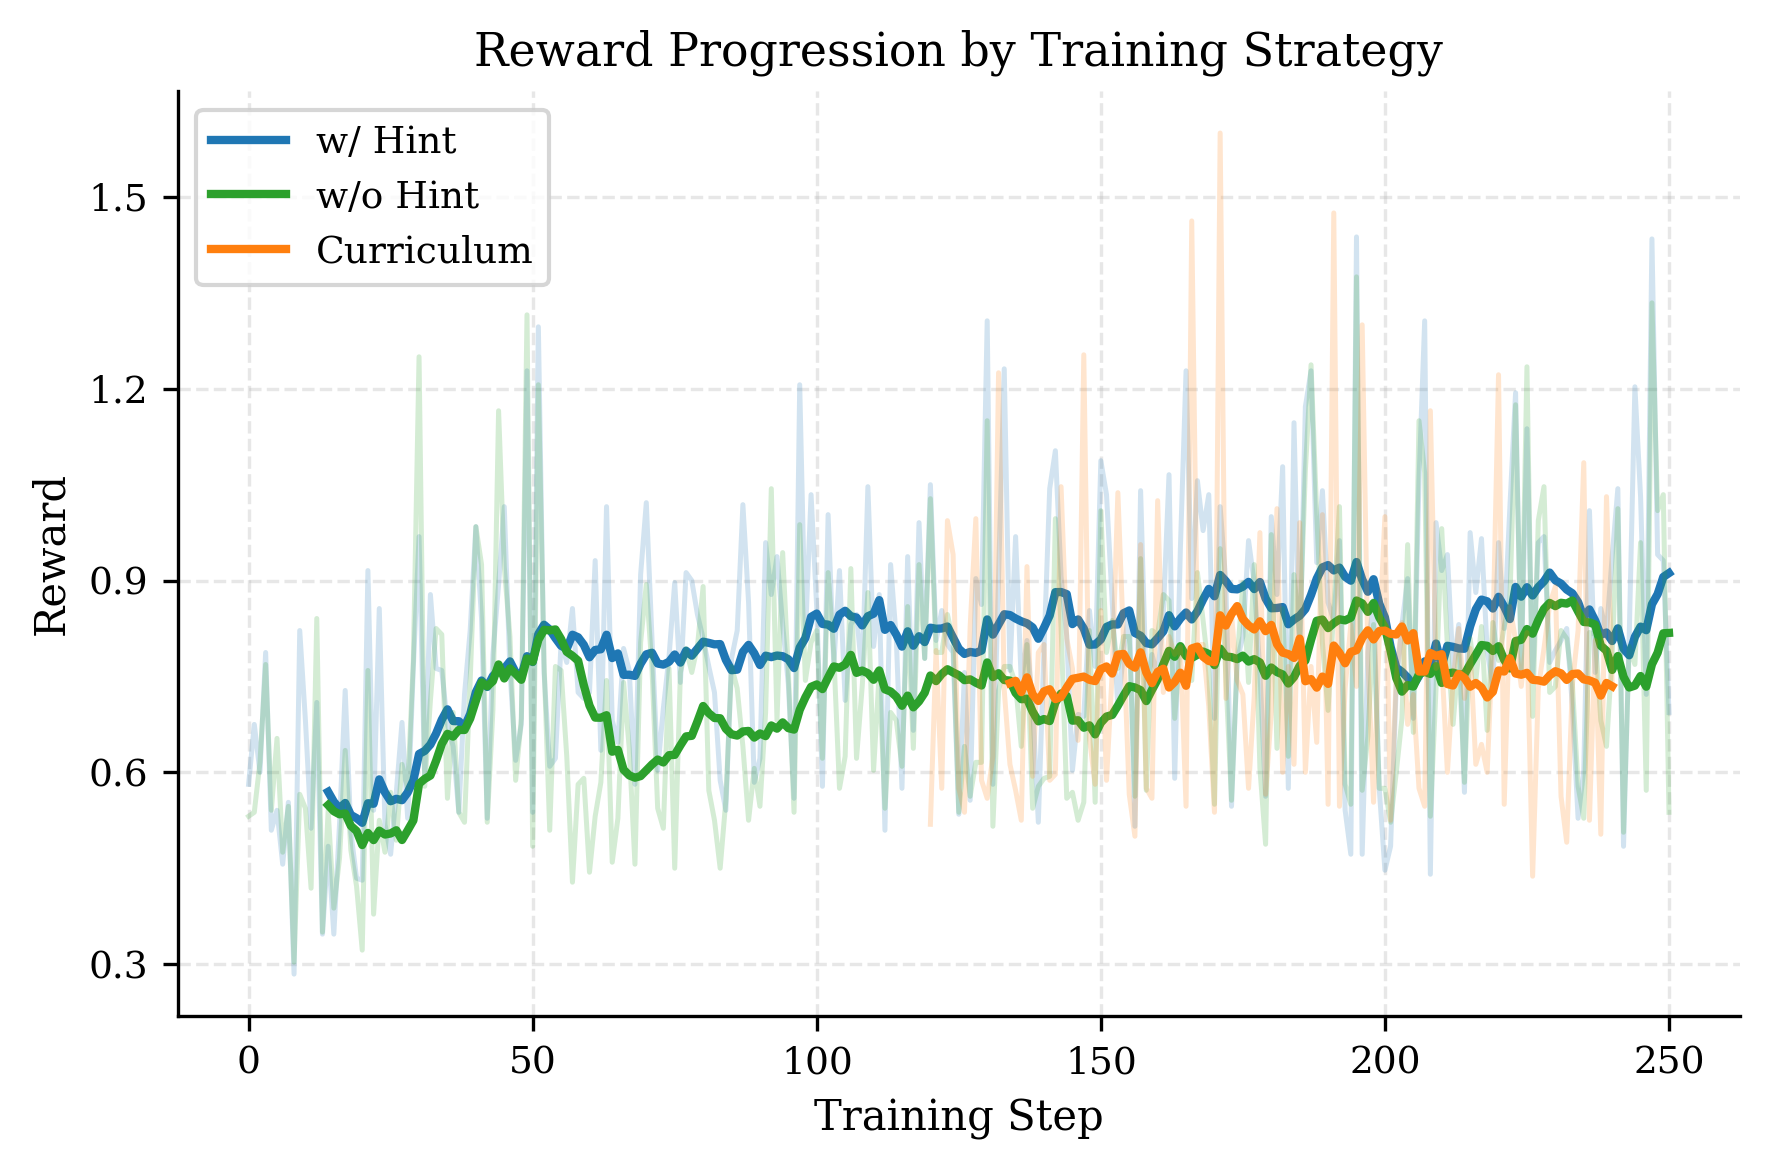

In [8]:
make_reward_plot_multi(
    rewards_list=[train_hint_rewards, train_no_hint_rewards, train_curriculum], 
    labels=["w/ Hint", "w/o Hint", "Curriculum"],
    window_size=15,
    save_path="progress.pdf"
)

# Pass@8 and Maj@8 during training (easy)

In [ ]:
steps = range(0, 250, 10)

llama_8b_pass = [0.3529]
llama_8b_maj = [0.2353]

# Python execution

In [55]:
execution_rewards = [
0.159374995157123,
0.215625002980232,
0.196875005960464,
0.225000001490116,
0.187500007450581,
0.243750004097819,
0.215624999254942,
0.23437499627471,
0.0375000014901161,
0.215625010430813,
0.112500004470348,
0.206250010058284,
0.206250002607703,
0.131250003352761,
0.187500005587935,
0.112500002607703,
0.187500005587935,
0.23437500372529,
0.18749999627471,
0.215625002980232,
0.131249997764826,
0.206250008195639,
0.168750001117587,
0.206250002607703,
0.19687500782311,
0.253124997019768,
0.215625004842877,
0.271875005215406,
0.290625005960465,
0.225000008940697,
0.300000011920929,
0.290625005960465,
0.281250014901161,
0.300000011920929,
0.290625005960465,
0.28125,
0.215625006705523,
0.262500010430813,
0.253125011920929,
0.281250007450581,
0.262500002980232,
0.281250011175871,
0.243750005960464,
0.225000008940697,
0.300000011920929,
0.290625013411045,
0.28125,
0.290625005960465,
0.271875008940697,
0.300000011920929,
0.206250000745058,
0.28125,
0.290625005960465,
0.206249998882413,
0.28125,
0.271875012665987,
0.28125,
0.196875002235174,
0.281250007450581,
0.290625005960465,
0.178125001490116,
0.234374998137355,
0.234375007450581,
0.271875008940697,
0.1875,
0.281250007450581,
0.253125008195639,
0.262500002980232,
0.243750005960464,
0.215625002980232,
0.271875008940697,
0.271875008940697,
0.281250011175871,
0.243750002235174,
0.281250007450581,
0.23437500372529,
0.300000011920929,
0.234375005587935,
0.225000005215406,
0.300000011920929,
0.271875008940697,
0.225000003352761,
0.281250011175871,
0.196874991059303,
0.262499995529652,
0.271874994039536,
0.243750005960464,
0.253125004470348,
0.262500002980232,
0.281250007450581,
0.271875012665987,
0.234375011175871,
0.290625005960465,
0.215625002980232,
0.28125,
0.281250011175871,
0.271875001490116,
0.290625005960465,
0.300000011920929,
0.271875008940697,
0.290625005960465,
0.300000011920929,
0.281250007450581,
0.271874994039536,
0.28125,
0.290625005960465,
0.271875012665987,
0.290625013411045,
0.215624997392297,
0.28125,
0.28125,
0.271875005215406,
0.262500006705523,
0.290625005960465,
0.281250007450581,
0.290625005960465,
0.290625005960465,
0.28125,
0.300000011920929,
0.281250007450581,
0.290625013411045,
0.28125,
0.271875008940697,
0.300000011920929,
0.300000011920929,
0.262500002980232,
0.281250011175871,
0.271875012665987,
0.262500006705523,
0.271875001490116,
0.300000011920929,
0.253125004470348,
0.300000011920929,
0.28125,
0.28125,
0.281250007450581,
0.290625005960465,
0.271875005215406,
0.253125011920929,
0.262499995529652,
0.271875001490116,
0.281250007450581,
0.290625013411045,
0.290625005960465,
0.271875008940697,
0.290625013411045,
0.271875005215406,
0.28125,
0.281250011175871,
0.271875012665987,
0.300000011920929,
0.234375009313226,
0.300000011920929,
0.300000011920929,
0.300000011920929,
0.281250007450581,
0.290625005960465,
0.300000011920929,
0.271875001490116,
0.300000011920929,
0.290625005960465,
0.215624997392297,
0.271875012665987,
0.300000011920929,
0.300000011920929,
0.225000003352761,
0.262500006705523,
0.300000011920929,
0.290625013411045,
0.281250007450581,
0.290625013411045,
0.290625013411045,
0.290625005960465,
0.290625013411045,
0.290625013411045,
0.300000011920929,
0.281250011175871,
0.290625013411045,
0.290625013411045,
0.253125004470348,
0.290625013411045,
0.290625005960465,
0.300000011920929,
0.215625010430813,
0.290625013411045,
0.28125,
0.290625005960465,
0.290625013411045,
0.290625013411045,
0.262500002980232,
0.300000011920929,
0.290625005960465,
0.290625005960465,
0.300000011920929,
0.290625005960465,
0.300000011920929,
0.262500006705523,
0.300000011920929,
0.271875001490116,
0.271875005215406,
0.300000011920929,
0.262500002980232,
0.290625005960465,
0.281250011175871,
0.281250007450581,
0.28125,
0.300000011920929,
0.290625005960465,
0.271875001490116,
0.290625005960465,
0.290625005960465,
0.300000011920929,
0.290625005960465,
0.300000011920929,
0.300000011920929,
0.262499999254942,
0.300000011920929,
0.28125,
0.271874994039536,
0.300000011920929,
0.300000011920929,
0.290625005960465,
0.28125,
0.300000011920929,
0.271875012665987,
0.281250007450581,
0.271875001490116,
0.281250011175871,
0.290625005960465,
0.234375009313226,
0.300000011920929,
0.290625005960465,
0.281250007450581,
0.281250011175871,
0.28125,
0.281250007450581,
0.300000011920929,
0.300000011920929,
0.290625005960465,
0.290625005960465,
0.290625005960465,
0.271875001490116,
0.262499995529652,
0.28125,
0.290625005960465,
0.281250011175871,
0.262500010430813,
0.300000011920929,
0.281250011175871,
0.290625013411045,
0.281250007450581,

]

In [62]:
tool_synthax = [
0.1875,
0.193750005215406,
0.18750000372529,
0.193750001490116,
0.1875,
0.181250002235174,
0.1875,
0.200000002980232,
0.1875,
0.187500007450581,
0.193750001490116,
0.193750005215406,
0.200000002980232,
0.193750001490116,
0.193750001490116,
0.1875,
0.193750001490116,
0.1875,
0.200000002980232,
0.193750001490116,
0.175000004470348,
0.193750005215406,
0.193750001490116,
0.193750001490116,
0.200000002980232,
0.168750002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.181250002235174,
0.200000002980232,
0.1875,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.18750000372529,
0.18750000372529,
0.168750002980232,
0.18750000372529,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.193750001490116,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.193750001490116,
0.200000002980232,
0.200000002980232,
0.181250002235174,
0.200000002980232,
0.18750000372529,
0.1875,
0.193750001490116,
0.193750005215406,
0.1875,
0.200000002980232,
0.193750001490116,
0.187500007450581,
0.200000002980232,
0.200000002980232,
0.1875,
0.193750001490116,
0.193750005215406,
0.181250005960464,
0.1875,
0.193750001490116,
0.18750000372529,
0.193750005215406,
0.1875,
0.193750001490116,
0.193750001490116,
0.193750001490116,
0.193750001490116,
0.1875,
0.200000002980232,
0.200000002980232,
0.18750000372529,
0.181250002235174,
0.193750005215406,
0.193750001490116,
0.200000002980232,
0.193750005215406,
0.193750001490116,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.187500007450581,
0.200000002980232,
0.193750001490116,
0.193750001490116,
0.200000002980232,
0.193750001490116,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.193750001490116,
0.187500007450581,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.181249998509884,
0.193750001490116,
0.193750001490116,
0.18750000372529,
0.200000002980232,
0.193750001490116,
0.1875,
0.200000002980232,
0.193750005215406,
0.200000002980232,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.200000002980232,
0.18750000372529,
0.174999997019768,
0.200000002980232,
0.175000000745058,
0.193750001490116,
0.200000002980232,
0.193750005215406,
0.18750000372529,
0.175000000745058,
0.200000002980232,
0.200000002980232,
0.200000002980232,
0.1875,
0.181250002235174,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.18750000372529,
0.193750005215406,
0.193750005215406,
0.193750001490116,
0.175000004470348,
0.193750001490116,
0.200000002980232,
0.18750000372529,
0.181250002235174,
0.1875,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.193750001490116,
0.193750001490116,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.200000002980232,
0.193750005215406,
0.18750000372529,
0.181250002235174,
0.200000002980232,
0.200000002980232,
0.193750005215406,
0.18750000372529,
0.193750001490116,
0.18750000372529,
0.181250005960464,
0.1875,
0.200000002980232,
0.193750001490116,
0.1875,
0.181250002235174,
0.181250002235174,
0.193750005215406,
0.181250002235174,
0.1875,
0.200000002980232,
0.193750005215406,
0.1875,
0.200000002980232,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.193750001490116,
0.1875,
0.200000002980232,
0.18750000372529,
0.1875,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.193750001490116,
0.181250002235174,
0.193750001490116,
0.193750005215406,
0.193750005215406,
0.175000000745058,
0.193750005215406,
0.200000002980232,
0.200000002980232,
0.193750001490116,
0.18750000372529,
0.200000002980232,
0.193750005215406,
0.193750001490116,
0.18750000372529,
0.193750001490116,
0.200000002980232,
0.1875,
0.1875,
0.200000002980232,
0.18750000372529,
0.200000002980232,
0.18750000372529,
0.1875,
0.193750001490116,
0.193750005215406,
0.193750001490116,
0.200000002980232,
0.181250005960464,
0.193750001490116,
0.193750005215406,
0.18750000372529,
0.193750005215406,
0.193750005215406,
0.18750000372529,
0.200000002980232,
0.200000002980232,
0.181250002235174,
0.193750001490116,
0.193750001490116,
0.193750001490116,
0.1875,
0.200000002980232,
0.18750000372529,
0.175000004470348,
0.1875,
0.181250002235174,
0.1875,
0.175000000745058,
0.193750005215406,
0.193750005215406,
0.1875,
0.162499999627471,

]

In [60]:
sum(execution_rewards[:10])/10 / 0.5

0.3862500049173832

In [61]:
sum(execution_rewards[-10:])/10 / 0.5

0.5606250137090687

In [64]:
sum(tool_synthax)/len(tool_synthax) / 2.0

0.0962524913600182

In [65]:
sum(tool_synthax[:20])/20 / 2.0

0.09578125104308123

In [66]:
sum(tool_synthax[-20:])/20 / 2.0

0.0940625011455267